In [32]:
import os
import numpy as np
import pandas as pd

In [33]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, regularizers

In [34]:
from tensorflow import keras

In [35]:
directory = 'clean_data//'

eeg_data = []
labels = []
for filename in os.scandir(directory):
    data = pd.read_csv(filename.path)
    if (data["label"][0] == 'Like'):
        labels.append(0)
    else:
        labels.append(1)
    eeg_data.append(data.drop(['label'] , axis = 1))
    

In [36]:
labels = np.array(labels)
eeg_data = np.array(eeg_data)

In [37]:
test_data = eeg_data[:83]
test_label = labels[:83]

eeg_data = eeg_data[83:]
labels = labels[83:]

In [38]:
# Set input shape for CNN

input_shape = (512,14,1)

# Define CNN model architecture
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu' , input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.3))

model.add(Flatten())



model.add(Dense(164, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))


In [39]:

model.compile(keras.optimizers.Adam(learning_rate = 0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
history = model.fit(eeg_data , labels , epochs = 200 , batch_size = 16)

Epoch 1/200
29/29 [==============================] - 43s 377ms/step - loss: 1.4749 - accuracy: 0.5359
Epoch 2/200
29/29 [==============================] - 11s 391ms/step - loss: 0.8377 - accuracy: 0.6514
Epoch 3/200
29/29 [==============================] - 11s 370ms/step - loss: 0.6636 - accuracy: 0.6950
Epoch 4/200
29/29 [==============================] - 10s 347ms/step - loss: 0.5128 - accuracy: 0.7473
Epoch 5/200
29/29 [==============================] - 10s 341ms/step - loss: 0.4688 - accuracy: 0.7756
Epoch 6/200
29/29 [==============================] - 10s 339ms/step - loss: 0.3725 - accuracy: 0.8192
Epoch 7/200
29/29 [==============================] - 11s 364ms/step - loss: 0.3386 - accuracy: 0.8540
Epoch 8/200
29/29 [==============================] - 11s 379ms/step - loss: 0.2909 - accuracy: 0.8802
Epoch 9/200
29/29 [==============================] - 10s 355ms/step - loss: 0.2519 - accuracy: 0.9063
Epoch 10/200
29/29 [==============================] - 11s 382ms/step - loss: 0.216

29/29 [==============================] - 8s 283ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 82/200
29/29 [==============================] - 8s 278ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 83/200
29/29 [==============================] - 8s 263ms/step - loss: 0.0062 - accuracy: 0.9978
Epoch 84/200
29/29 [==============================] - 8s 284ms/step - loss: 0.0067 - accuracy: 0.9956
Epoch 85/200
29/29 [==============================] - 8s 277ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 86/200
29/29 [==============================] - 8s 269ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 87/200
29/29 [==============================] - 8s 278ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 88/200
29/29 [==============================] - 9s 312ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 89/200
29/29 [==============================] - 8s 282ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 90/200
29/29 [==============================] - 8s 290ms/step - loss: 0.0024 - accuracy: 

29/29 [==============================] - 3s 120ms/step - loss: 0.0038 - accuracy: 0.9978
Epoch 161/200
29/29 [==============================] - 4s 142ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 162/200
29/29 [==============================] - 4s 140ms/step - loss: 0.0027 - accuracy: 0.9978
Epoch 163/200
29/29 [==============================] - 4s 125ms/step - loss: 4.1888e-04 - accuracy: 1.0000
Epoch 164/200
29/29 [==============================] - 4s 125ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 165/200
29/29 [==============================] - 3s 117ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 166/200
29/29 [==============================] - 3s 115ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 167/200
29/29 [==============================] - 4s 123ms/step - loss: 9.8185e-04 - accuracy: 1.0000
Epoch 168/200
29/29 [==============================] - 3s 120ms/step - loss: 7.5019e-04 - accuracy: 1.0000
Epoch 169/200
29/29 [==============================] - 3s 116ms/step - loss

In [41]:
model.evaluate(test_data,test_label)


3/3 [==============================] - 1s 45ms/step - loss: 2.5240 - accuracy: 0.4578


[2.5239686965942383, 0.45783132314682007]

In [42]:
y_pred=[]

for data in test_data:
    y_pred.append(np.argmax(model.predict(np.array([data , ]))))

1/1 [==============================] - 0s 31ms/step


In [43]:
import matplotlib.pyplot as plt

In [44]:
# x = ['']
# barWidth = 0.001
# fig = plt.subplots(figsize =(12, 8))
# br1 = np.arange(len(x))
# br2 = [x + barWidth for x in br1]
# plt.bar(br1  , history.history['accuracy'] , color = "blue" , label = "training accuracy" ,width = barWidth)
# plt.bar(br2 , model.evaluate(test_data,test_label)[1] , color = "red" , label = "testing accuracy" , width = barWidth)
# plt.xlabel('folds', fontweight ='bold', fontsize = 15)
# plt.ylabel('accuracies', fontweight ='bold', fontsize = 15)
# plt.xticks([r + barWidth for r in range(len(x))],x)
# plt.plot(history.history['accuracy'] ,label = "training accuracy")
# plt.plot(model.evaluate(test_data,test_label)[1] , label = "testing accuracy" )
# plt.legend()
# plt.show()

# evaluate model

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

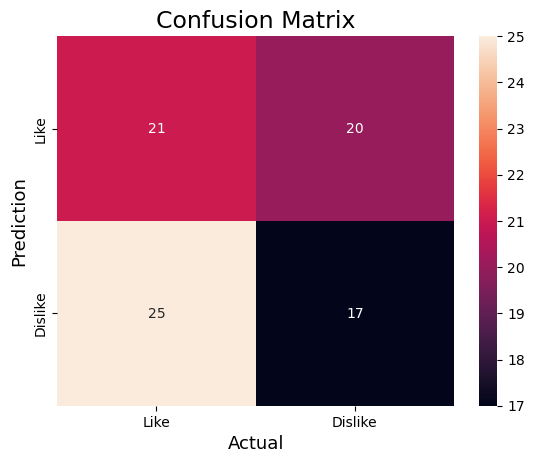

In [46]:
cm = confusion_matrix(test_label,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Like','Dislike'],
            yticklabels=['Like','Dislike'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [47]:
accuaracy = (cm[0][0] + cm[1][1]) / test_data.shape[0] *100
recall = (cm[0][0]) /(cm[0][0] + cm[1][0]) *100
precision = (cm[0][0]) /(cm[0][0] + cm[0][1]) *100
f1_score = (2*recall*precision)/(recall + precision)

In [48]:
print('Accuracy: ' , accuaracy)
print('Precision: ' , precision)
print('Recall: ' , recall)
print('F1 SCore: ' , f1_score)

Accuracy:  45.78313253012048
Precision:  51.21951219512195
Recall:  45.65217391304348
F1 SCore:  48.275862068965516


# save model

In [49]:
# model.save('models/modified_data_single_fold_patwise')

# load model

In [50]:

# new_model = tf.keras.models.load_model('models/modified_data_single_fold_patwise//')

# # Check its architecture
# new_model.summary()

In [51]:
# model.evaluate((np.concatenate((X_train,X_test))),np.concatenate((y_train,y_test)))
# new_model.evaluate(eeg_data,labels)

Text(0.5, 0, 'Epoch')

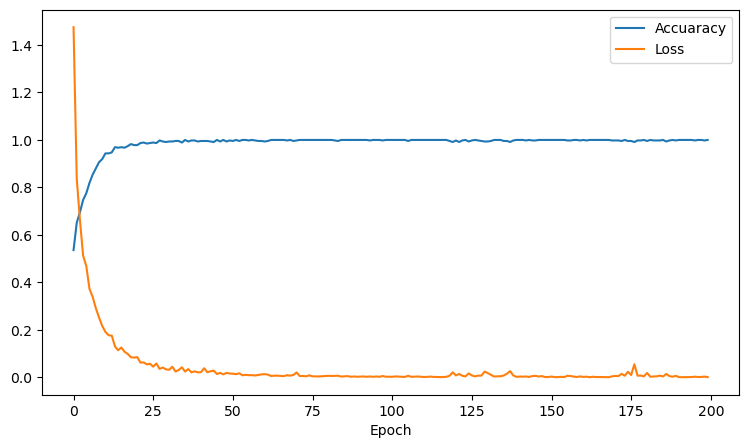

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.plot(history.history['accuracy'] , label ='Accuaracy')
plt.plot(history.history['loss'] , label = 'Loss')
plt.legend()
plt.xlabel("Epoch")